In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dna_seq = pd.read_csv("./dna_seq_families.csv")
dna_seq.head()

,dna_sequence,gene_family
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
# Remove the duplicate rows
print(dna_seq.shape[0])
dna_seq = dna_seq.drop_duplicates()
print(dna_seq.shape[0])


4380
3629


In [5]:
# print statistics of the dataset
dna_seq.dna_sequence.describe()

count                                                  3629
unique                                                 3629
top       ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...
freq                                                      1
Name: dna_sequence, dtype: object

In [6]:
dna_seq.gene_family.describe()

count    3629.000000
mean        3.524111
std         2.124251
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         6.000000
Name: gene_family, dtype: float64

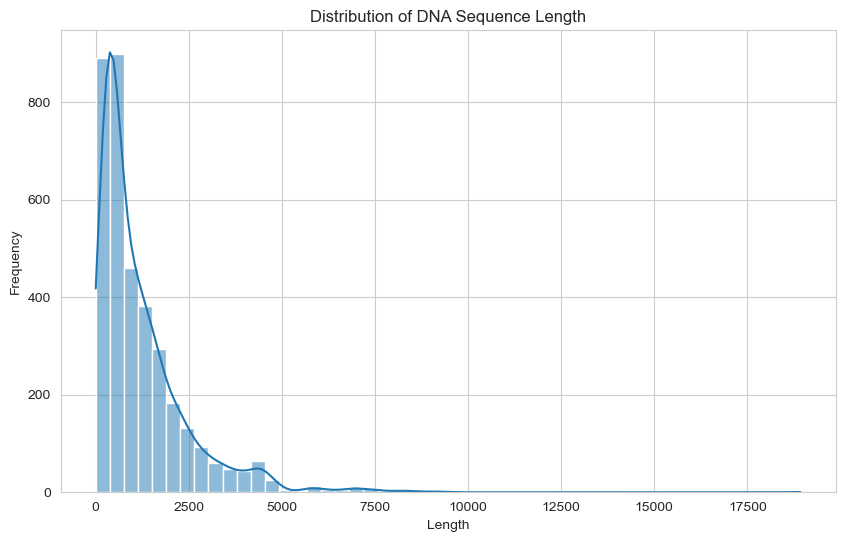

In [7]:
# create a new column with the length of the dna_sequence
dna_seq['length'] = dna_seq['dna_sequence'].apply(len)

# plot the distribution of the length of the dna_sequence
plt.figure(figsize=(10, 6))
sns.histplot(dna_seq['length'], bins=50, kde=True)
plt.title("Distribution of DNA Sequence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Plot the number of sequences per gene family
dna_seq['gene_family'].value_counts()

gene_family
6    1109
4     590
3     570
0     446
1     408
2     291
5     215
Name: count, dtype: int64

In [9]:
# print all unique characters in the dna_sequence
unique_chars = set()
for seq in dna_seq['dna_sequence']:
    unique_chars.update(seq)
print(unique_chars)

{'N', 'A', 'G', 'C', 'T'}


In [10]:
# Count the occurances of each character in the dna_sequence
char_counts = {}
for seq in dna_seq['dna_sequence']:
    for char in seq:
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

# Print the counts of each character
for char, count in char_counts.items():
    print(f"{char}: {count}")

A: 1120024
T: 974371
G: 1159196
C: 1165364
N: 493


In [11]:
# check if all characters are uppercase
all_upper = True
for seq in dna_seq['dna_sequence']:
    if not seq.isupper():
        all_upper = False
        break
print(all_upper)

True
